In [1]:
%matplotlib inline
from sklearn import model_selection
import sklearn
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn import preprocessing
from sklearn import tree

In [2]:
from sklearn.datasets import load_wine
raw_data =load_wine()

In [3]:
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data['target']=raw_data.target
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])
classdataset1=["class_1","class_0","class_2"]
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

(178, 15)

In [5]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<AxesSubplot:xlabel='alcohol'>

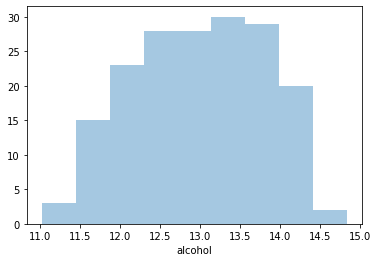

In [7]:
sb.distplot(data['alcohol'],kde=0)

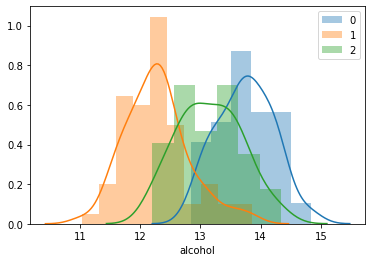

In [8]:
for i in data.target.unique():
    sb.distplot(data['alcohol'][data.target==i],
                 kde=1,label='{}'.format(i))

plt.legend()

alcohol


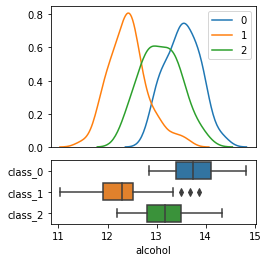

malic_acid


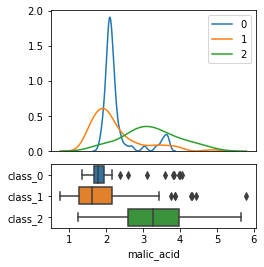

ash


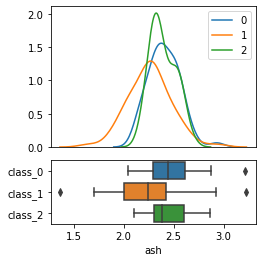

alcalinity_of_ash


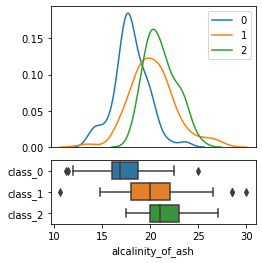

magnesium


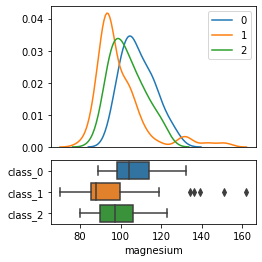

total_phenols


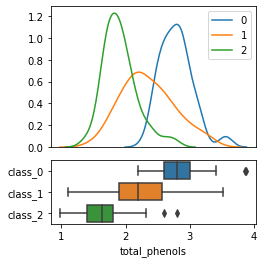

flavanoids


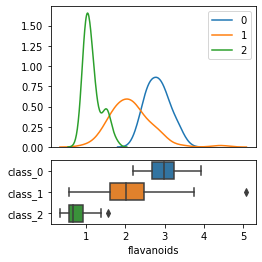

nonflavanoid_phenols


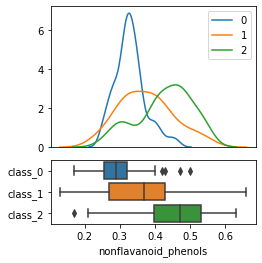

proanthocyanins


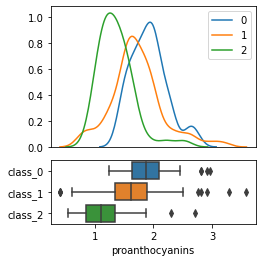

color_intensity


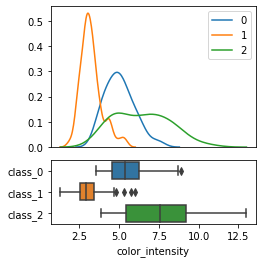

hue


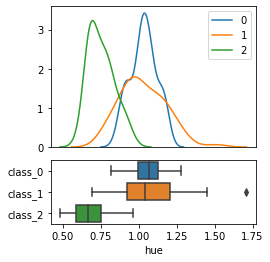

od280/od315_of_diluted_wines


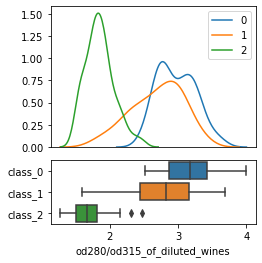

proline


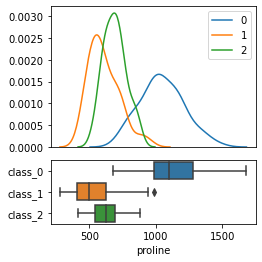

In [9]:
import matplotlib.gridspec as gridspec
for feature in raw_data['feature_names']:
    print(feature)
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sb.boxplot(x=feature,y='class',data=data,ax=ax2)
    sb.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
    sb.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
    sb.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()

In [10]:
data2=pd.read_csv("mushrooms.csv")
data2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
data2.info()
data2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

(8124, 23)

In [12]:
data2.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [13]:
features=["cap-shape","cap-surface","cap-color","bruises","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat","class"]
for feature in features:
    print(feature)
    print(data2[feature].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    print("************************")     

cap-shape
x    45.0%
f    38.8%
k    10.2%
b     5.6%
s     0.4%
c     0.0%
Name: cap-shape, dtype: object
************************
cap-surface
y    39.9%
s    31.5%
f    28.6%
g     0.0%
Name: cap-surface, dtype: object
************************
cap-color
n    28.1%
g    22.6%
e    18.5%
y    13.2%
w    12.8%
b     2.1%
p     1.8%
c     0.5%
r     0.2%
u     0.2%
Name: cap-color, dtype: object
************************
bruises
f    58.4%
t    41.6%
Name: bruises, dtype: object
************************
gill-attachment
f    97.4%
a     2.6%
Name: gill-attachment, dtype: object
************************
gill-spacing
c    83.9%
w    16.1%
Name: gill-spacing, dtype: object
************************
gill-size
b    69.1%
n    30.9%
Name: gill-size, dtype: object
************************
gill-color
b    21.3%
p    18.4%
w    14.8%
n    12.9%
g     9.3%
h     9.0%
u     6.1%
k     5.0%
e     1.2%
y     1.1%
o     0.8%
r     0.3%
Name: gill-color, dtype: object
************************
stalk-shape


In [14]:
#Wine dataset
X1=data[raw_data['feature_names']]
y1=data['class']

#Mushroom dataset
feature_names=["cap-shape","cap-surface","cap-color","bruises","gill-attachment","gill-spacing","gill-size","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-color","ring-number","ring-type","population","habitat"]
X2=data2[feature_names].values
y2=data2['class'].values

In [15]:
le_cap_shape=preprocessing.LabelEncoder()
le_cap_shape.fit(['x','f','k','b','s','c'])
X2[:,0]=le_cap_shape.transform(X2[:,0])

le_cap_surface=preprocessing.LabelEncoder()
le_cap_surface.fit(['y','s','f','g'])
X2[:,1]=le_cap_surface.transform(X2[:,1])

le_cap_color=preprocessing.LabelEncoder()
le_cap_color.fit(['n','g','e','y','w','b','p','c','u','r'])
X2[:,2]=le_cap_color.transform(X2[:,2])

le_bruises=preprocessing.LabelEncoder()
le_bruises.fit(['f','t'])
X2[:,3]=le_bruises.transform(X2[:,3])

le_gill_attachment=preprocessing.LabelEncoder()
le_gill_attachment.fit(['f','a'])
X2[:,4]=le_gill_attachment.transform(X2[:,4])

le_gill_spacing=preprocessing.LabelEncoder()
le_gill_spacing.fit(['c','w'])
X2[:,5]=le_gill_spacing.transform(X2[:,5])

le_gill_size=preprocessing.LabelEncoder()
le_gill_size.fit(['b','n'])
X2[:,6]=le_gill_size.transform(X2[:,6])

le_gill_color=preprocessing.LabelEncoder()
le_gill_color.fit(['b','p','w','n','g','h','u','k','e','y','o','r','t'])
X2[:,7]=le_gill_color.transform(X2[:,7])

le_stalk_shape=preprocessing.LabelEncoder()
le_stalk_shape.fit(['e','c','b','r','?'])
X2[:,8]=le_stalk_shape.transform(X2[:,8])

le_stalk_root=preprocessing.LabelEncoder()
le_stalk_root.fit(['s','k','f','y'])
X2[:,9]=le_stalk_root.transform(X2[:,9])

le_stalk_surface_above_ring=preprocessing.LabelEncoder()
le_stalk_surface_above_ring.fit(['s','k','f','y'])
X2[:,10]=le_stalk_surface_above_ring.transform(X2[:,10])

le_stalk_surface_below_ring=preprocessing.LabelEncoder()
le_stalk_surface_below_ring.fit(['w','p','g','n','b','o','e','c','y'])
X2[:,11]=le_stalk_surface_below_ring.transform(X2[:,11])

le_stalk_color_above_ring=preprocessing.LabelEncoder()
le_stalk_color_above_ring.fit(['w','p','g','n','b','o','e','c','y'])
X2[:,12]=le_stalk_color_above_ring.transform(X2[:,12])

le_stalk_color_below_ring=preprocessing.LabelEncoder()
le_stalk_color_below_ring.fit(['w','p','g','n','b','o','e','c','y'])
X2[:,13]=le_stalk_color_below_ring.transform(X2[:,13])

le_veil_color=preprocessing.LabelEncoder()
le_veil_color.fit(['o','t','n'])
X2[:,14]=le_veil_color.transform(X2[:,14])

le_ring_number=preprocessing.LabelEncoder()
le_ring_number.fit(['p','e','l','f','n'])
X2[:,15]=le_ring_number.transform(X2[:,15])

le_population=preprocessing.LabelEncoder()
le_population.fit(['v','y','s','n','a','c'])
X2[:,16]=le_population.transform(X2[:,16])

le_habitat=preprocessing.LabelEncoder()
le_habitat.fit(['d','g','p','l','u','m','w'])
X2[:,17]=le_habitat.transform(X2[:,17])

le_class=preprocessing.LabelEncoder()
le_class.fit(['p','e'])
y2=le_class.transform(y2)

In [16]:
def bestK (X,y):
    k_range = range(1, 31)
    
    # empty list to store scores
    k_scores = []

    # 1. we will loop through reasonable values of k
    for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
         knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
         scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
         k_scores.append(scores.mean())

    print("The best k is :",np.asarray(k_scores).argmax()+1)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    # plt.plot(x_axis, y_axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-validated accuracy')

The best k is : 1


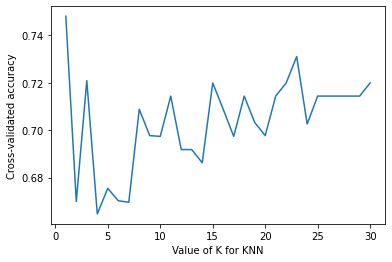

In [17]:
bestK(X1,y1)

In [ ]:
bestK(X2,y2)

In [ ]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 
from sklearn.tree import export_graphviz
def graphTree(features,classes,estimator):
    graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=features, class_names=classes 
   , filled = True))
    display(SVG(graph.pipe(format='svg')))

In [ ]:
def graphBox (results,names):
# boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [ ]:
# prepare configuration for cross validation test harness
seed = 7

In [ ]:
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('CART', DecisionTreeClassifier(criterion='gini',max_depth=5)))
models.append(('NB', GaussianNB()))

In [ ]:
# evaluate each model in turn n is for k
def modeling(X,y,n,scores):
    
    results=[]
    names=[]
    for name, model in models:
        kfold = model_selection.KFold(n_splits=n, random_state=seed)
        print(name)
        #Start time
        start_time = time.process_time()
        #to become parameter because it differs binary and multy
        for score in scores:
            cv_results=model_selection.cross_val_score(model, X, y, cv=kfold, scoring=score)
            print(score,":",cv_results.mean())
        model.fit(X,y)
        #End Time
        execution_time = time.process_time() - start_time  
        print("execution time : ",execution_time,"seconds")
        results.append(cv_results)
        names.append(name)
        
        #Decision tree classifier(plotting the tree)
        if (name == "CART"):
            decisionTree=model
            graphTree(raw_data['feature_names'],classdataset1,decisionTree)
    graphBox (results,names)

In [ ]:
scores=["accuracy"]
modeling(X1,y1,5,scores)
modeling(X1,y1,10,scores)
modeling(X1,y1,20,scores)

In [ ]:
scores=["accuracy","neg_log_loss","jaccard",'f1']
modeling(X2,y2,5,scores)
modeling(X2,y2,10,scores)
modeling(X2,y2,20,scores)